In [1]:
from pathlib import Path
from time import time

input_file = Path('../../AdventOfCode_inputs/AoC-2025-11-input.txt')

rinput = input_file.read_text()

In [2]:
sinput = '''aaa: you hhh
you: bbb ccc
bbb: ddd eee
ccc: ddd eee fff
ddd: ggg
eee: out
fff: out
ggg: out
hhh: ccc fff iii
iii: out
'''

In [3]:
s2input = '''svr: aaa bbb
you: aaa bbb
aaa: fft
fft: ccc
bbb: tty
tty: ccc
ccc: ddd eee
ddd: hub
hub: fff
eee: dac
dac: fff
fff: ggg hhh
ggg: out
hhh: out
'''

In [4]:
ainput = rinput

In [5]:
netw = [s.split() for s in ainput.splitlines()]

**Part One**

In [6]:
import networkx as nx

In [7]:
startTime = time()

G = nx.DiGraph()
G.add_node('out')
for nb in netw:
    G.add_node(nb[0][0:-1])
for nb in netw:
    for i in range(1,len(nb)):
        G.add_edge(nb[0][0:-1], nb[i])
count = 0        
for p in nx.all_simple_paths(G,'you','out'):
    count += 1
ans1 = count

time()-startTime

0.02802300453186035

In [8]:
ans1

688

**Part Two**

In [9]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] =(25.0,25.0)

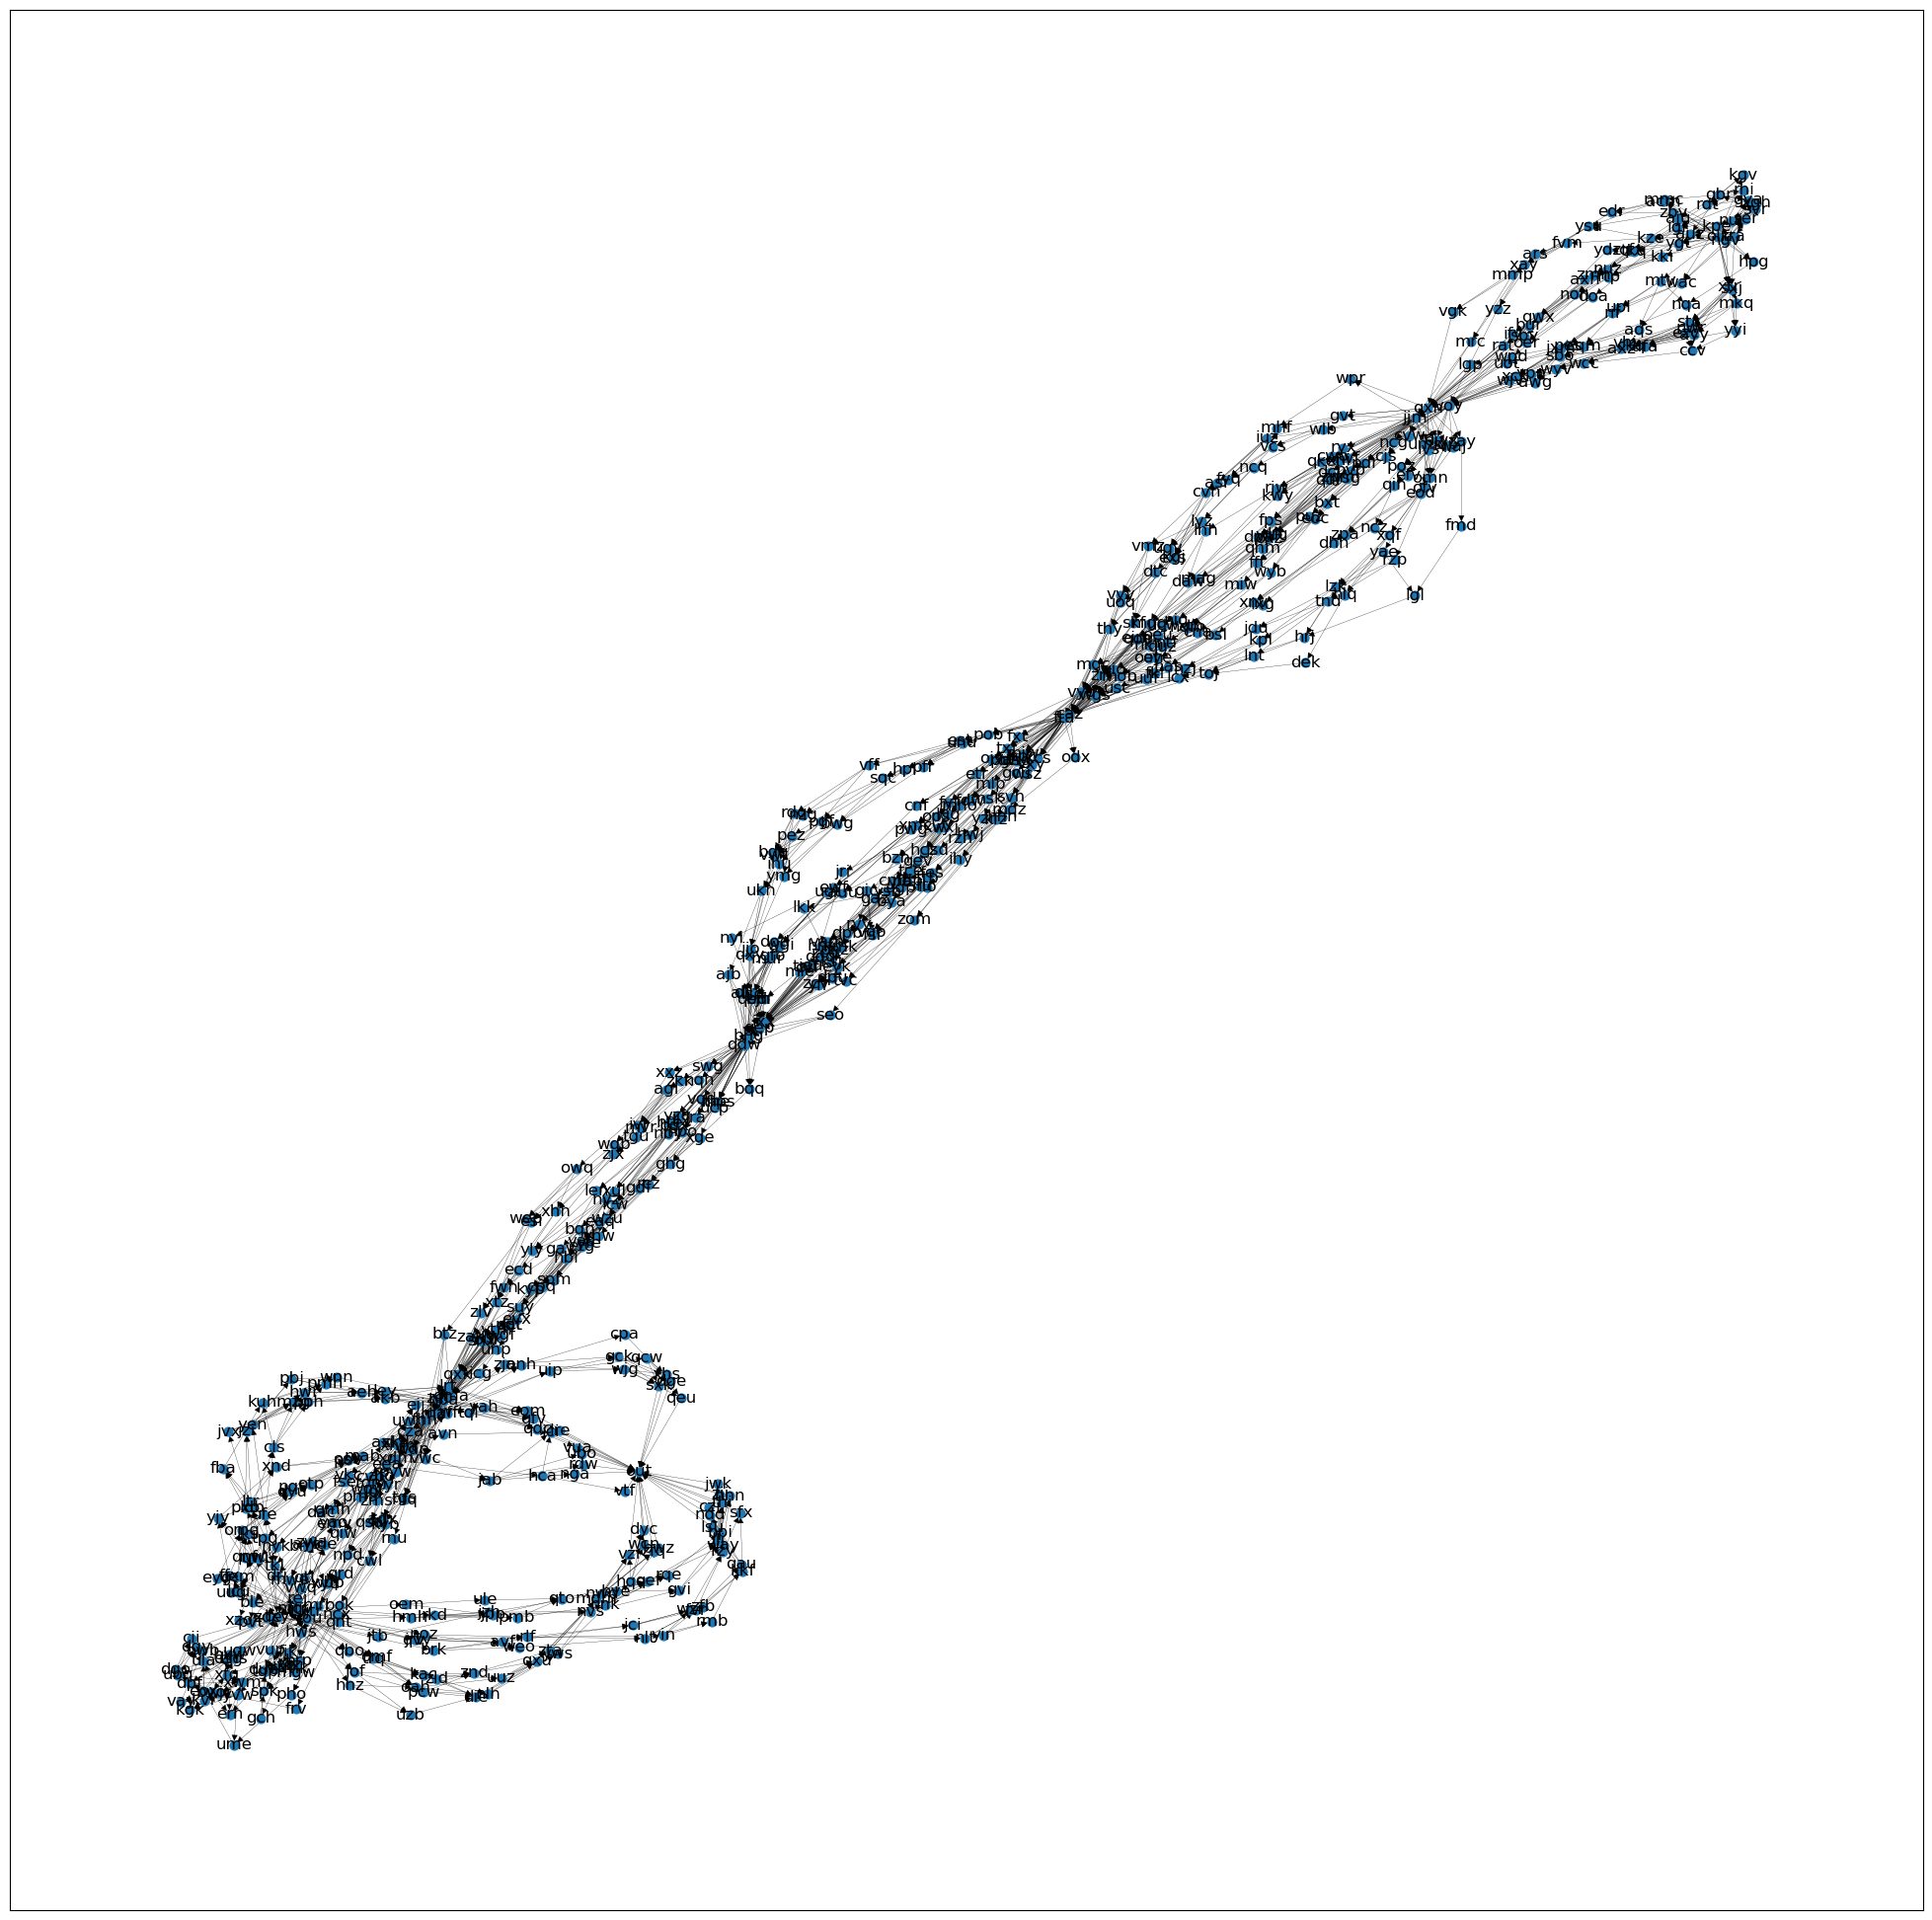

In [10]:
G = nx.DiGraph()
G.add_node('out')
for nb in netw:
    G.add_node(nb[0][0:-1])
for nb in netw:
    for i in range(1,len(nb)):
        G.add_edge(nb[0][0:-1], nb[i])

nx.draw_networkx(G, node_size=40, width=0.2)

In [11]:
for layer, nodes in enumerate(nx.topological_generations(G)):
    for node in nodes:
        G.nodes[node]["layer"] = layer

In [12]:
G.nodes["fft"]["layer"], G.nodes["dac"]["layer"]

(9, 25)

In [13]:
# DFS with memoization also too slow
from functools import lru_cache

@lru_cache()
def countFrom(start, score):
    if start == "out":
        if score == 101:
            return 1
        
    # prune by topological layer 
    if G.nodes[start]["layer"] > G.nodes["fft"]["layer"] and score == 0:
        return 0 # never going to pass fft
    if G.nodes[start]["layer"] > G.nodes["dac"]["layer"] and score < 100:
        return 0 # never going to pass dac
        
    nscore = score
    if start =="fft":
        nscore += 1
    elif start == "dac":
        nscore += 100
        
    count = 0
    for n in G.neighbors(start):
        count += countFrom(n, nscore)
        
    return count

startTime = time() 
ans2 = countFrom("svr", 0)
print(time()-startTime, 's')

ans2

0.0019626617431640625 s


293263494406608

# DFS traverse whole graph too too slow

startTime = time()
stack = [['svr',0]]
count = 0
while len(stack) > 0:
    curr = stack.pop()
    
    if curr[0] == 'out':
        if curr[1] == 2:
            count += 1
        continue
        
    newflag = curr[1]
    if curr[0] == 'fft' or curr[0] == 'dac':
        newflag += 1
    
    for s in G.neighbors(curr[0]):
        stack.append([s,newflag])

ans2 = count
print(time()-startTime, 's')